In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy
import math

In [9]:
RDF = np.genfromtxt('rdf2.dat',dtype = 'float')

   

2201

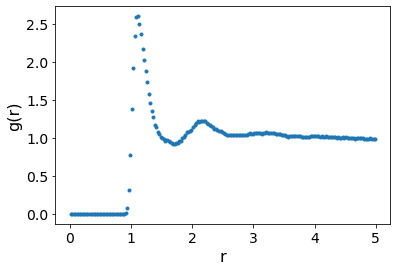

In [18]:
plt.plot(RDF[:,0],RDF[:,1],'.');
plt.xlabel("r",fontsize = 16);
plt.ylabel("g(r)",fontsize = 16);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.savefig("g_r.jpg",dpi = 600)
plt.show()

# Calculating structure factor from g(r)

$$\left[S(k) = 1+4 \pi \rho\int_0^\infty r^2 g(r) \frac{sin(kr)}{kr}dr\right]^*$$

\* from Allen and Tildesley

$$\left[S(k) = 1+4 \pi \rho\int_0^\infty r (g(r)-1) \frac{sin(kr)}{k}dr\right]^+$$

\+  A. Filipponi, "The radial distribution function probed by X-ray absorption spectroscopy", Journal of Physics: Condensed Matter 6 pp. 8415-8427 (1994)

In [19]:
import cmath
def Struct_fact1(g_r,r,dr,density):
    S_k = []
    inv = (2*cmath.pi)/r
    for k in inv:
        ind = 0
        integ = 0
        for R in r:
            integ = integ + (R*R*g_r[ind]*(math.sin(k*R)/(k*R))*dr)
            ind = ind + 1
        S_k.append(1 + 4*3.14*density*integ*dr)
    return S_k
def Struct_fact2(g_r,r,dr,density):
    S_k = []
    for k in r:
        ind = 0
        integ = 0
        for R in r:
            integ = integ + (R*(g_r[ind]-1)*(math.sin(k*R)))
            ind = ind + 1
        S_k.append(1 + 4*3.14*density*integ*dr/k)
    return S_k

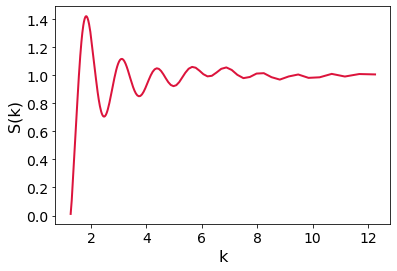

In [23]:
dr = RDF[1,0]-RDF[0,0]
density = 1.0
k = (2*cmath.pi)/RDF[:,0]
S_k = Struct_fact1(RDF[20:,1],RDF[20:,0],dr,density)
plt.plot(k[20:],S_k,linewidth = 2,color = 'crimson');
plt.xlabel("k",fontsize = 16);
plt.ylabel("S(k)",fontsize = 16);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.savefig("struct_fact.jpg",dpi = 600)
plt.show()


In [20]:
dr

0.024999999999999998

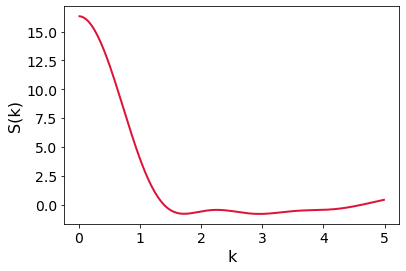

In [29]:
S_k = Struct_fact2(RDF[:,1],RDF[:,0],dr,density)
plt.plot(RDF[:,0],S_k,color = 'crimson',linewidth = 2);
plt.xlabel("k",fontsize = 16);
plt.ylabel("S(k)",fontsize = 16);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.show()

From D.C. Rapaport,
$$S(k) = 1 + \rho \int g(r) e^{-ik.r} dr$$

In [3]:
import cmath
r = RDF[:,0]
k_comp = []
S_k = []
g_r = RDF[:,1]
for k in r:
    ind = 0
    integ = 0
    for R in r:
        integ = integ + g_r[ind]*cmath.exp(complex(0,(k*R)))*dr
        ind = ind+1
    S_k.append(1 + density*integ)



NameError: name 'RDF' is not defined

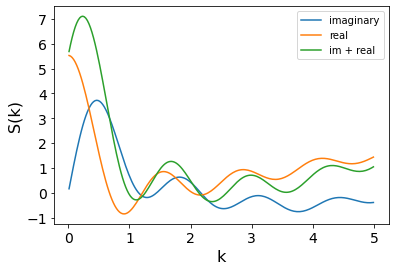

In [47]:
S_k = np.array(S_k)
S_k.real
plt.plot(r,S_k.imag,label = 'imaginary');
plt.plot(r,S_k.real,label = "real");
plt.plot(r,S_k.real+S_k.imag,label = "im + real");
plt.legend()
plt.xlabel("k",fontsize = 16);
plt.ylabel("S(k)",fontsize = 16);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.show()
